In [21]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from io import BytesIO

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ATDw0PTB_zD6pqAsQRee1wZLiO6Yq9LnEtZsfs6Nlb2R',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'sdg31maternalhealthtracker-donotdelete-pr-j58cgmuesfxuz4'
object_key = 'Maternal_Health-Total_DLHS3.csv'

# Get object and read bytes
response = cos_client.get_object(Bucket=bucket, Key=object_key)
body = response['Body'].read()  # read() gives us the byte content

# Decode it using the correct encoding
df_1 = pd.read_csv(BytesIO(body), encoding='ISO-8859-1')

df_1.head(10)


,State/UT,District,Mothers registered in the first trimester when they were pregnant with last live birth/still birth (%),Mothers who had at least 3 Ante-Natal care visits during the last pregnancy (%),Mothers who got at least one TT injection when they were pregnant with their last live birth / still birth (%)#,Institutional births (%),Delivery at home assisted by a doctor/nurse /LHV/ANM(%),Mothers who received post natal care within 48 hours of delivery of their last child (%)
0,Andaman and Nicober Island,North & Middle Andaman,46.5,76.7,93.2,67.7,0.5,67.3
1,Andaman and Nicober Island,South Andaman,51.0,83.2,96.3,89.1,1.4,73.1
2,Andhra Pradesh,Adilabad,56.3,79.1,83.2,43.4,3.8,36.0
3,Andhra Pradesh,Anantapur,65.2,84.0,95.8,66.8,6.4,69.6
4,Andhra Pradesh,Chittoor,64.1,91.4,94.6,74.1,7.1,76.6
5,Andhra Pradesh,East Godavari,54.0,93.0,95.0,86.5,5.8,93.1
6,Andhra Pradesh,Guntur,67.7,88.1,97.1,78.9,5.5,81.2
7,Andhra Pradesh,Hyderabad,86.3,97.8,100.0,95.6,1.5,80.6
8,Andhra Pradesh,Kadapa,72.1,84.6,98.1,78.6,3.1,83.2
9,Andhra Pradesh,Karimnagar,84.0,97.1,97.8,89.6,3.1,93.2


In [44]:
# View column names and basic dataset info
print(df_1.columns)
df_1.info()


Index(['State_UT', 'District', 'First_Trimester_Reg', 'ANC_3_or_More',
       'TT_Injection', 'Institutional_Births', 'Home_Delivery_Assisted',
       'Postnatal_Care_48hrs'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                601 non-null    object 
 1   District                601 non-null    object 
 2   First_Trimester_Reg     600 non-null    float64
 3   ANC_3_or_More           600 non-null    float64
 4   TT_Injection            600 non-null    float64
 5   Institutional_Births    601 non-null    float64
 6   Home_Delivery_Assisted  555 non-null    float64
 7   Postnatal_Care_48hrs    556 non-null    float64
dtypes: float64(6), object(2)
memory usage: 37.7+ KB


In [25]:
# Rename columns for easier coding
df_1.columns = [
    "State_UT",
    "District",
    "First_Trimester_Reg",
    "ANC_3_or_More",
    "TT_Injection",
    "Institutional_Births",
    "Home_Delivery_Assisted",
    "Postnatal_Care_48hrs"
]

# ✅ Check updated column names
print(df_1.columns)

# ✅ Basic stats after cleaning
print(df_1.describe(include='all'))

# ✅ Check for missing values
print(df_1.isnull().sum())


Index(['State_UT', 'District', 'First_Trimester_Reg', 'ANC_3_or_More',
       'TT_Injection', 'Institutional_Births', 'Home_Delivery_Assisted',
       'Postnatal_Care_48hrs'],
      dtype='object')
             State_UT  District  First_Trimester_Reg  ANC_3_or_More  \
count             601       601           600.000000     600.000000   
unique             34       597                  NaN            NaN   
top     Uttar Pradesh  Hamirpur                  NaN            NaN   
freq               70         2                  NaN            NaN   
mean              NaN       NaN            48.330500      54.334500   
std               NaN       NaN            21.351982      26.004149   
min               NaN       NaN            10.000000       7.500000   
25%               NaN       NaN            29.725000      29.950000   
50%               NaN       NaN            46.500000      54.950000   
75%               NaN       NaN            64.025000      73.550000   
max               NaN

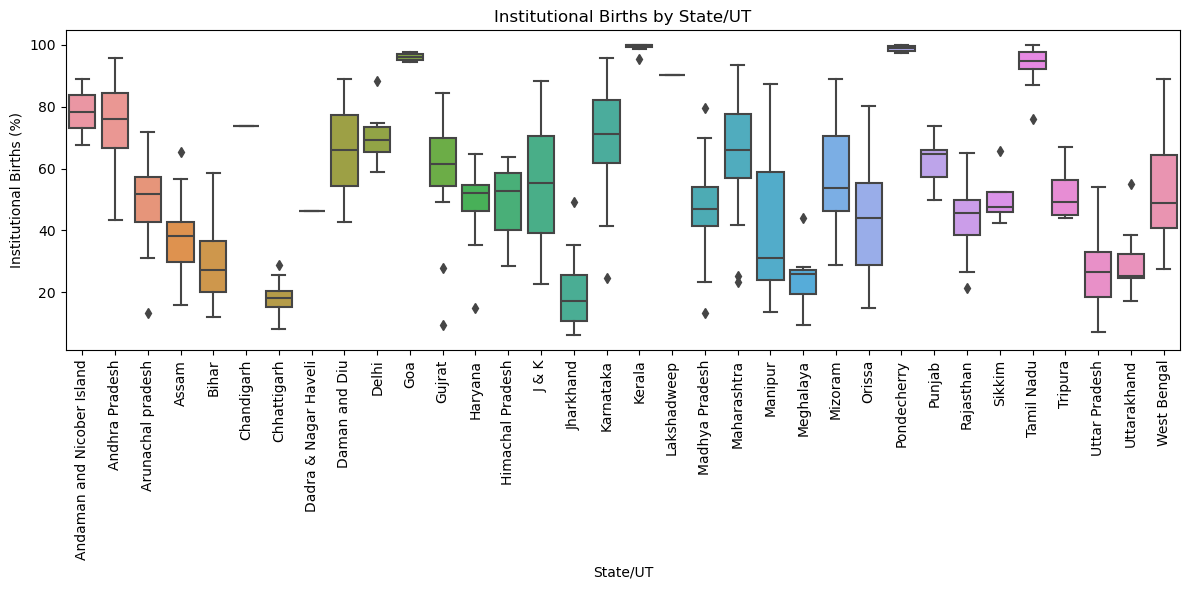

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='State_UT', y='Institutional_Births', data=df_1)
plt.xticks(rotation=90)
plt.title("Institutional Births by State/UT")
plt.xlabel("State/UT")
plt.ylabel("Institutional Births (%)")
plt.tight_layout()
plt.show()


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


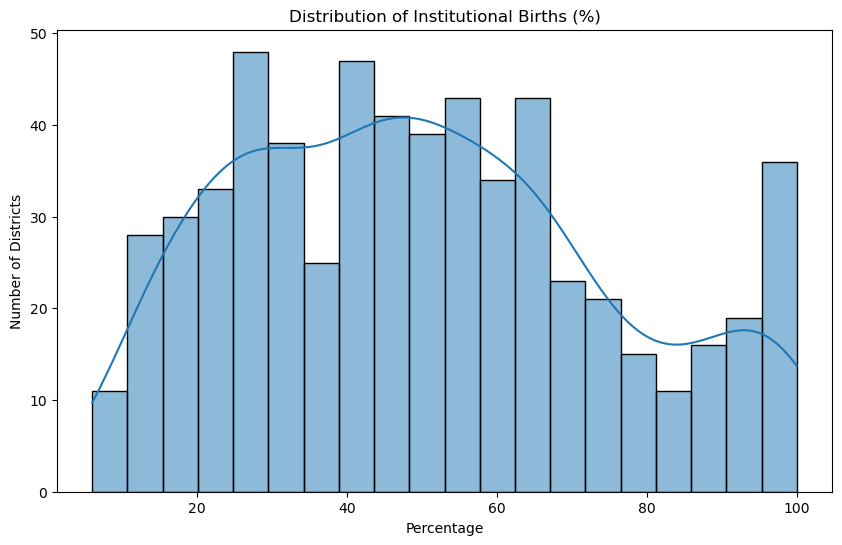

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Clean column names
df_1.columns = df_1.columns.str.strip()

# Convert column to numeric if needed
df_1["Institutional_Births"] = pd.to_numeric(df_1["Institutional_Births"], errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_1["Institutional_Births"].dropna(), bins=20, kde=True)
plt.title("Distribution of Institutional Births (%)")
plt.xlabel("Percentage")
plt.ylabel("Number of Districts")
plt.show()


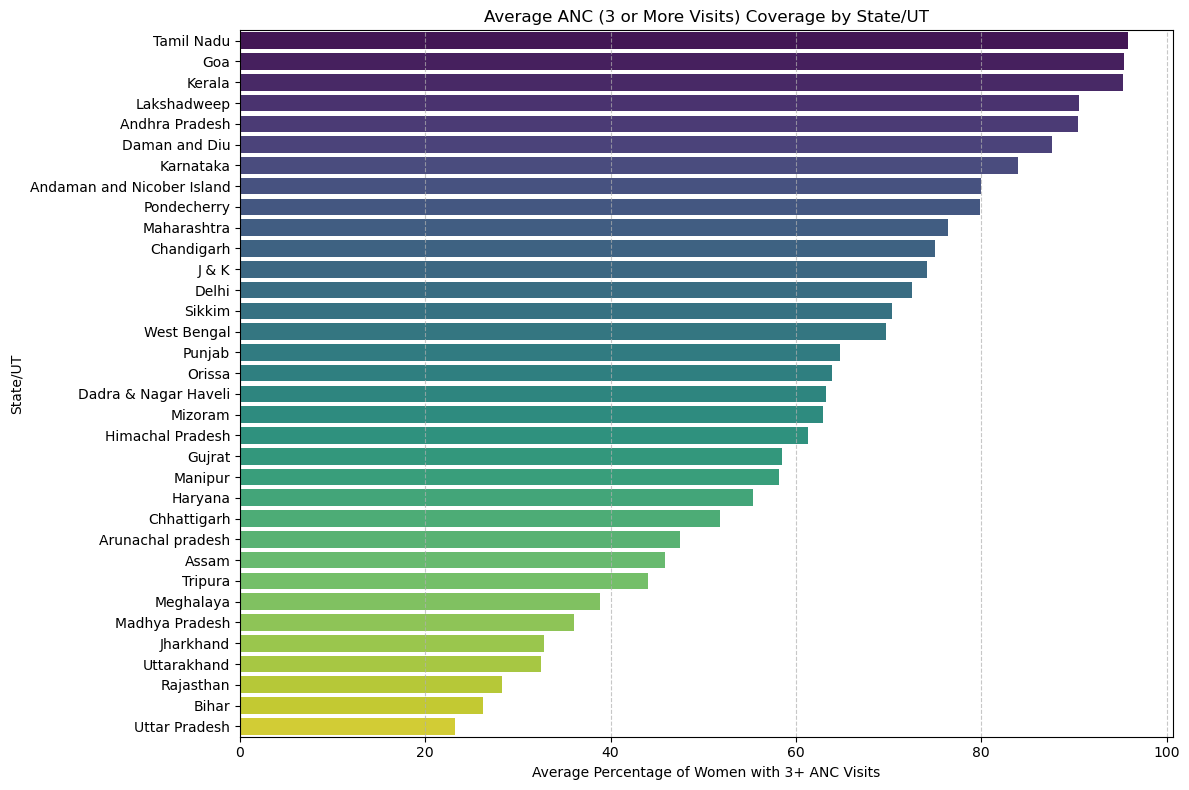

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by state and calculating the mean of ANC_3_or_More
statewise_anc = df_1.groupby("State_UT")["ANC_3_or_More"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=statewise_anc.values, y=statewise_anc.index, palette="viridis")
plt.title("Average ANC (3 or More Visits) Coverage by State/UT")
plt.xlabel("Average Percentage of Women with 3+ ANC Visits")
plt.ylabel("State/UT")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [41]:
top_inst_births = df_1.sort_values(by='Institutional_Births', ascending=False)[['District', 'State_UT', 'Institutional_Births']].head(10)

# Bottom 10
bottom_inst_births = df_1.sort_values(by='Institutional_Births')[['District', 'State_UT', 'Institutional_Births']].head(10)

print("Top 10 Districts (Institutional Births %):")
print(top_inst_births.to_string(index=False))

print("\nBottom 10 Districts (Institutional Births %):")
print(bottom_inst_births.to_string(index=False))


Top 10 Districts (Institutional Births %):
      District    State_UT  Institutional_Births
       Chennai  Tamil Nadu                 100.0
     Kozhikode      Kerala                 100.0
        Kollam      Kerala                 100.0
        Kannur      Kerala                 100.0
          Mahe Pondecherry                 100.0
Pathanamthitta      Kerala                 100.0
      Kottayam      Kerala                 100.0
    Malappuram      Kerala                 100.0
     Ernakulam      Kerala                 100.0
     Alappuzha      Kerala                 100.0

Bottom 10 Districts (Institutional Births %):
      District      State_UT  Institutional_Births
     Sahebganj     Jharkhand                   6.0
      Bahraich Uttar Pradesh                   7.1
      Kawardha   Chhattigarh                   8.2
     Balrampur Uttar Pradesh                   8.3
  Shahjahanpur Uttar Pradesh                   8.9
         Dumka     Jharkhand                   9.2
 E. Garo Hills

In [42]:
# Average PNC coverage by state
pnc_state_avg = df_1.groupby('State_UT')['Postnatal_Care_48hrs'].mean().sort_values()

print("States with Lowest Avg Postnatal Care (within 48 hrs):")
print(pnc_state_avg.head(5).round(2))


States with Lowest Avg Postnatal Care (within 48 hrs):
State_UT
Meghalaya      25.04
Bihar          25.92
Tripura        26.48
Uttarakhand    29.30
Jharkhand      30.71
Name: Postnatal_Care_48hrs, dtype: float64


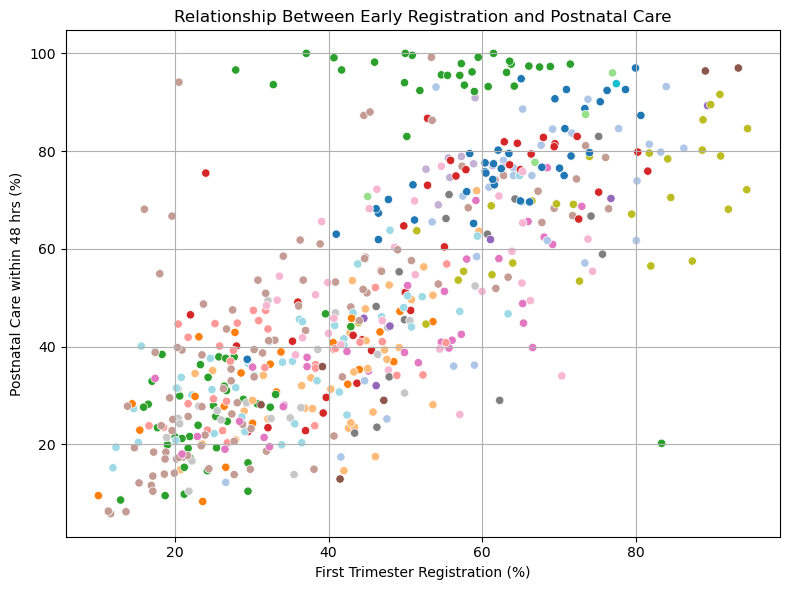

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="First_Trimester_Reg", y="Postnatal_Care_48hrs", data=df_1, hue="State_UT", palette="tab20", legend=False)
plt.title("Relationship Between Early Registration and Postnatal Care")
plt.xlabel("First Trimester Registration (%)")
plt.ylabel("Postnatal Care within 48 hrs (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


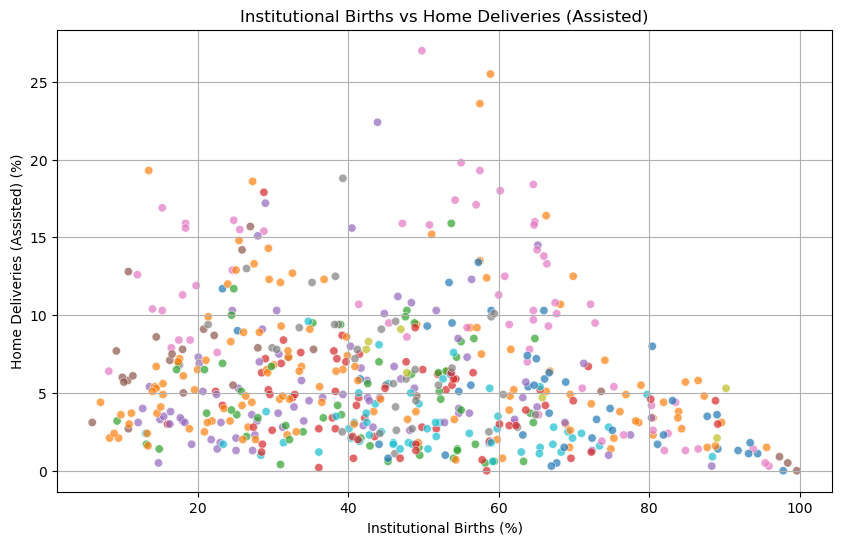

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_1,
    x="Institutional_Births",
    y="Home_Delivery_Assisted",
    hue="State_UT",
    alpha=0.7,
    edgecolor='w',
    palette='tab10',
    legend=False
)
plt.title("Institutional Births vs Home Deliveries (Assisted)")
plt.xlabel("Institutional Births (%)")
plt.ylabel("Home Deliveries (Assisted) (%)")
plt.grid(True)
plt.show()


In [46]:
df_1["Composite_Score"] = df_1[["First_Trimester_Reg", "ANC_3_or_More", "TT_Injection", "Institutional_Births", "Postnatal_Care_48hrs"]].mean(axis=1)
df_1.sort_values("Composite_Score", ascending=False)[["State_UT", "District", "Composite_Score"]].head(10)


,State_UT,District,Composite_Score
406,Pondecherry,Mahe,100.000
266,Kerala,Pathanamthitta,98.950
267,Kerala,Thiruvananthapuram,98.450
264,Kerala,Malappuram,98.425
260,Kerala,Kasargod,98.300
258,Kerala,Idukki,98.300
256,Kerala,Alappuzha,97.375
465,Tamil Nadu,Chennai,97.225
257,Kerala,Ernakulam,97.200
268,Kerala,Thrissur,97.175


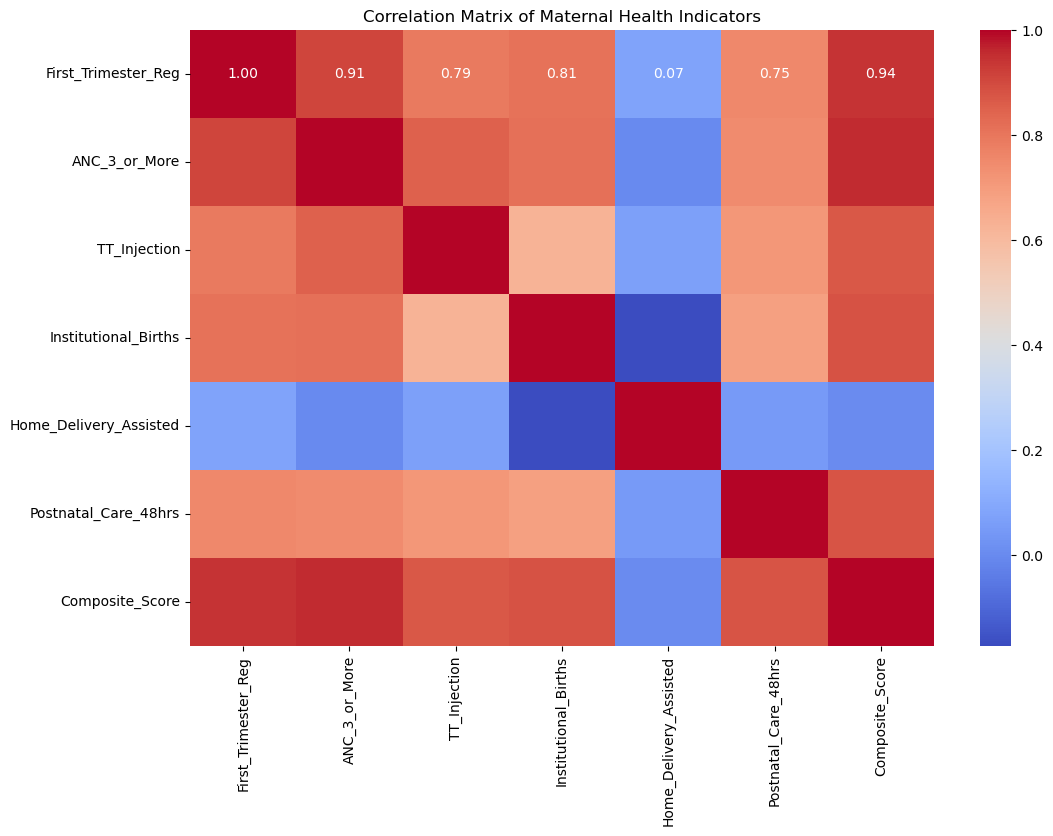

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_1.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Maternal Health Indicators")
plt.show()
